In [5]:
- title: Занятие 12
- author: Vitalii Zavadskyi
- date: 2024-11-18
- slug: 2024_lpr_lab12
- ipynb_url: download/2024_lpr_lab12.ipynb

SyntaxError: invalid decimal literal (2938452579.py, line 4)

# Лабораторное занятие 12

## Введение в "машинное обучение"

Машинное обучение (ML) — это наука, изучающая алгоритмы, автоматически улучшающиеся благодаря опыту. © Яндекс.Образование

Основная задача ML: подобрать алгоритм (модель), которая решала бы соотвествующую задачу на определенном наборе данных. Часто набор данных ограничен и не содержит всех возможных вариаций, но в этом и состоит "магия" машинного обучения — иметь возможность ответить на поставленный вопрос почти для любого набора данных при настройке алгоритма на ограниченных данных

Среди задач ML можно выделить следующие (первые две мы рассмотрим в данной лабораторной работе):
- Задачи регрессии (определение числового параметра по совокупности характеристик объекта)
- Задачи классификации (определение принадлежности объекта к опрределенному классу)
- Задача класстеризации (разбиение выборки на непересекающиеся группы)
- Задача поиска аномалий
- и т.д.

Задачей регрессии может быть предсказание цены на недвижимость при наличии информации о расположении недвижимости, доступности транспорта и т.д.

Задача классификации — определение наличия болезни у пациента по его физическим параметрам.

Для обучения алгоритмов используется несколько основных подходов:
- Обучение с учителем/supervised learning (предоставляется набор размеченных данных)
- Обучение без учителя/unsupervised learning (набор данных не содержит информации о классах, целевых значениях)
- Обучение с подкреплением/reinforcement learning (алгоритм обучается на данных за "награду")

В этой лабораторной работе мы познакомимся с ML на языке Python с помощью библиотеки scikit-learn `sklearn`.

Библиотека scikit-learn содержит множество моделей. На этом семинаре мы познакомимся с моделями для обучения с учителем: `KNeighborsClassifier` и `DecisionTreeClassifier`

In [ ]:
!pip install scikit-learn
   


Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.6.0-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.0-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import sklearn


## Метод k-ближайших соседей

Рассмотрим модель k-ближайших соседей (k-nearest neighbors kNN). Интуитивное понимание модели — для выбранного набора данных можно вычислить расстояние между точками. Принадлежность точки к определенному классу определяется "голосованием" k ближайших соседей. Чаще всего k нечетное (*почему же?*)

Анимация для объяснения метода kNN: [ссылка](https://machinelearningknowledge.ai/wp-content/uploads/2021/07/Sklearn-KNN-Classifier.gif)

Здесь оставим наглядную картинку

![image]( 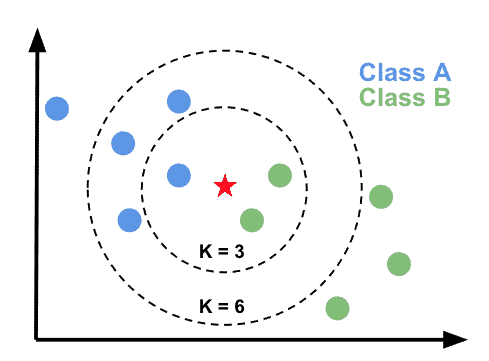)

Расстояние между точками признаков можно считать различными способами: как в евклидовом пространстве, так и косинусоидальной метрикой. Выбор метрики зависит от решаемой задачи.

Метод kNN можно использовать для решения задач регрессии и классфификации. На текущий момент рассмотрим ее использование для задачи бинарной (всего два возможных состояния) классфикации на примере искуственных данных.

Сгенерируем пары точек на двумерной плоскости

In [7]:
import numpy as np


np.random.seed(1)
n_samples = 1000

X = np.random.rand(n_samples, 2) * 2.5 - 1.25

Определим такие точки, которые лежат внутри окружности радиуса 1

In [8]:
y = (X**2).sum(axis=1) < 1

Отобразим получившиеся данные

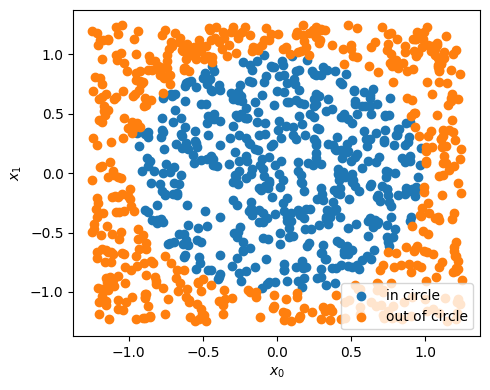

In [9]:
from matplotlib import pyplot as plt

plt.figure(figsize=(5, 4))
plt.scatter(X[y, 0], X[y, 1], label="in circle")
plt.scatter(X[~y, 0], X[~y, 1], label="out of circle")
plt.legend()
plt.xlabel(r"$x_0$")
plt.ylabel(r"$x_1$")
plt.tight_layout()

Составим из набора точек и меток таблицу

In [10]:
import pandas as pd

df = pd.DataFrame(np.vstack((X.T, y)).T, columns=["x0", "x1", "target"])

df.head()

,x0,x1,target
0,-0.207445,0.550811,1.0
1,-1.249714,-0.494169,0.0
2,-0.883110,-1.019154,0.0
3,-0.784349,-0.386098,1.0
4,-0.258081,0.097042,1.0


Каждая строка данных описывается 2 признаками. Каждой строке данных из переменной `X` соответствует свое значение из `y`.

Попробуем нарисовать рраспределения признаков

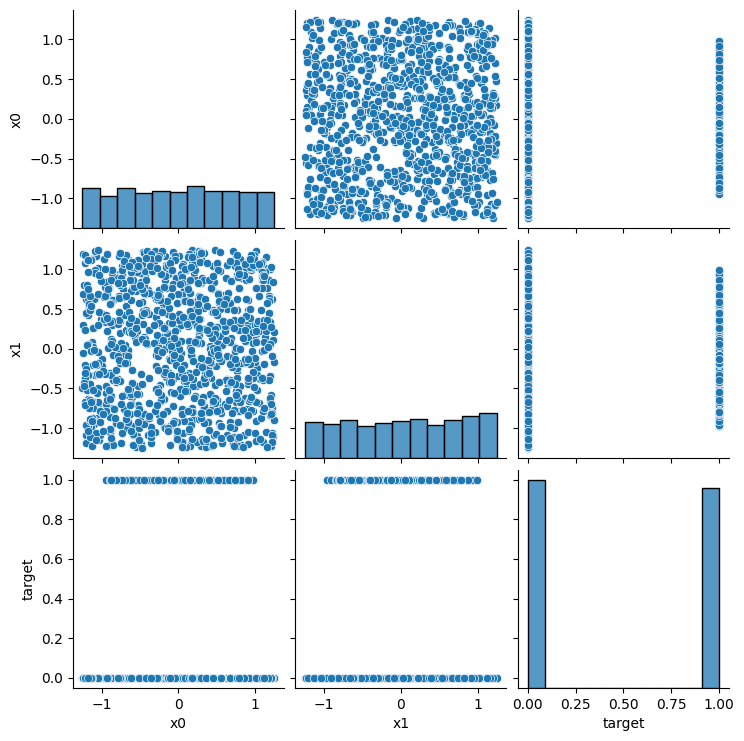

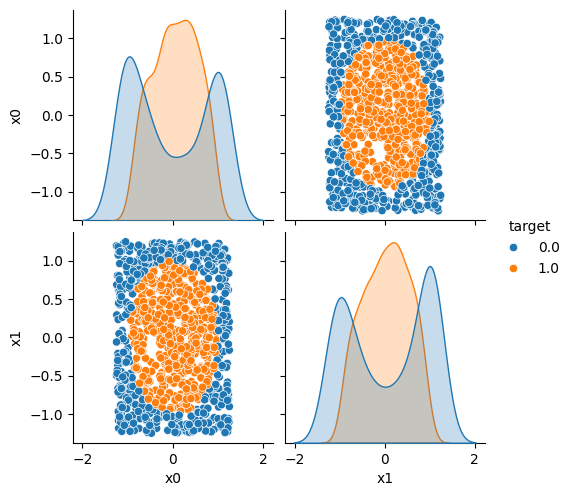

In [11]:
import seaborn as sns

sns.pairplot(df);
sns.pairplot(df, hue="target");

По  распредеелниям можно точно утверждать, что выборка является сбалансрованной (одинаковое количество точек в кругу и вне). Координаты точек в окружности скорее всего будут распределены более узко вокруг 0 (обратите внимание на гистограммы во второй группе графиков)

Построим коррреляционную матрицу:

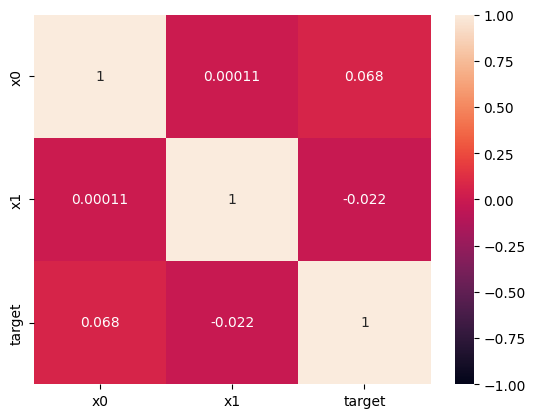

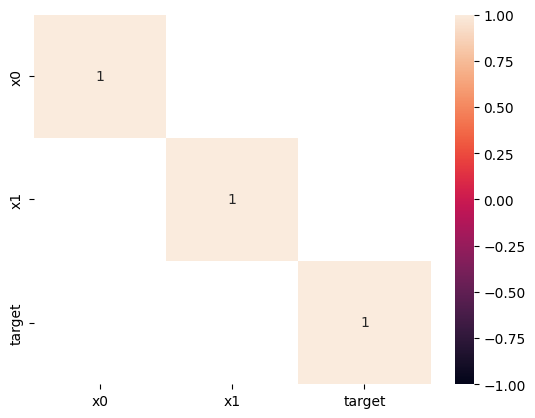

In [12]:
correlation_df = df.corr()
sns.heatmap(correlation_df, vmin=-1, vmax=1, annot=True)
plt.figure()
sns.heatmap(correlation_df[np.abs(correlation_df) > 0.75], vmin=-1, vmax=1, annot=True);

По виду матрицы нельзя сказать о наличии корреляций между параметрами.

## Разбиение данных на выборки

Стоит задаться вопросом: а как проверить качество модели после обучения?

Для этого набор данных разделяется на тренировочную и тестовую выборки (и еще более редко на третью выборку — валидационную)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Мы зафиксировали процесс разделения набора данных на тренировочную и тестовую выборки с помощью параметра `random_state`.

**Упражнение 1**. Изобразите на двумерной плоскости тренировочную и тестовую выборки (с помощью разных цветов) и не забудьте отметить принадлежность точки к определенному классу (с помощью разной формы `facecolor="None"`).

C:\Users\user\AppData\Local\Temp\ipykernel_15036\2389799534.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


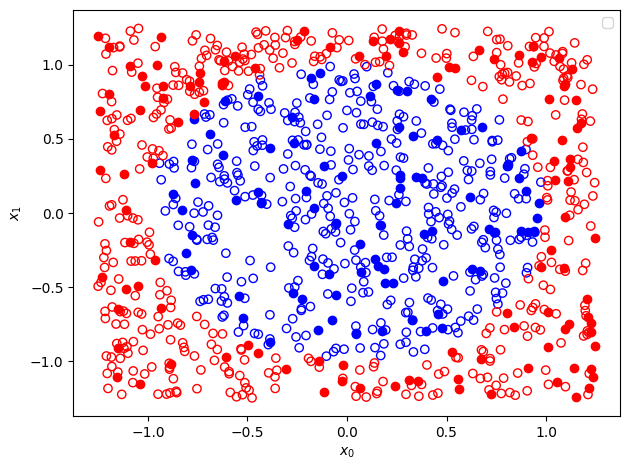

In [14]:
# Вставьте ваш код

plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], facecolor='none', edgecolor='blue')
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], facecolor='none', edgecolor='red')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], facecolor='blue', edgecolor='blue', marker='o')
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], facecolor='red', edgecolor='red', marker='o')

plt.legend()
plt.xlabel(r"$x_0$")
plt.ylabel(r"$x_1$")
plt.tight_layout()

Теперь же обратися к классу `KNeighborsClassifier`. Он реализует метод kNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")

У модели есть параметр `n_neighbors`. Он отвечает за количество соседей, которые используется при оценке параметра.

Еще интересным параметром является `metric`. Он определяет каким образом вычисляется расстояние между точками. Приведем несколько определений для метрики расстояния:
- `euclidean` $$ \rho(x, y) = \sqrt{\sum\limits_{i = 1}^{N}\left(x_i - y_i\right)^2}$$
- `manhattan` $$ \rho(x, y) = \sum\limits_{i = 1}^{N}|x_i - y_i|$$
- `minkowski` $$ \rho(x, y) = \left(\sum\limits_{i = 1}^{N}\left(x_i - y_i\right)^p\right)^{1 / p}, p \in (0, 1)$$

Попробуем обучить нашу модель

In [16]:
model_knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(metric='euclidean')

Теперь можно предсказать значение целевого параметра на тренировочной выборке данных

In [17]:
y_pred = model_knn.predict(X_test)

Определим качество работы нашей модели. Это можно сделать с помощью `confusion_matrix` и `accuracy_score`
- `confusion_matrix` возвращает матрицу несоотвествия (матрицу ошибок); значение в $ij$-элементе соотвествует количеству элементов, которые пренадлежат группе $i$ и были отмечены как элементы группы $j$. Для случая бинарной классификации:
$$\begin{pmatrix} \text{True positive}\ (\mathrm{TP}) & \text{False positive}\ \mathrm{(FP)} \\ \text{False negative}\ \mathrm{(FN)} & \text{True negative}\ (\mathrm{TN}) \\ \end{pmatrix}$$
- `accuracy_score` соотвествует доле правильно предсказаных меток $$ \dfrac{\mathrm{TP} + \mathrm{TN}}{\mathrm{TP} + \mathrm{TN} + \mathrm{FP} + \mathrm{FN}} $$

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

knn_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
knn_confussion_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

print(f"Accuracy of kNN: {knn_accuracy}")
print(f"Confussion matrix of kNN:\n {knn_confussion_matrix}")

Accuracy of kNN: 0.97
Confussion matrix of kNN:
 [[110   4]
 [  2  84]]


Дополнительно вводятся метрики качества `precision` и `recall`
- `precision` доля релевантных объектов среди извлеченных
$$ \mathrm{precision} = \dfrac{\mathrm{TP}}{\mathrm{TP} + \mathrm{FP}} $$
- `recall` доля релевантных объектов, которые были извлечены
$$ \mathrm{recall} = \dfrac{\mathrm{TP}}{\mathrm{TP} + \mathrm{FN}} $$

**Упражнение 1.5**. Вычислите `precision` и `recall` для вышеопределенной модели

In [19]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)

print(f"Precsion of kNN: {precision}")
print(f"Recall of kNN: {recall}")

Precsion of kNN: 0.9545454545454546
Recall of kNN: 0.9767441860465116


Мы получили очень хорошее значение точности для нашей модели. Можем ли мы получить больше? Конечно, ~~если откинем метод kNN и просто начертим окружность радиуса 1~~!

Давайте попробуем оптимизировать количество соседей

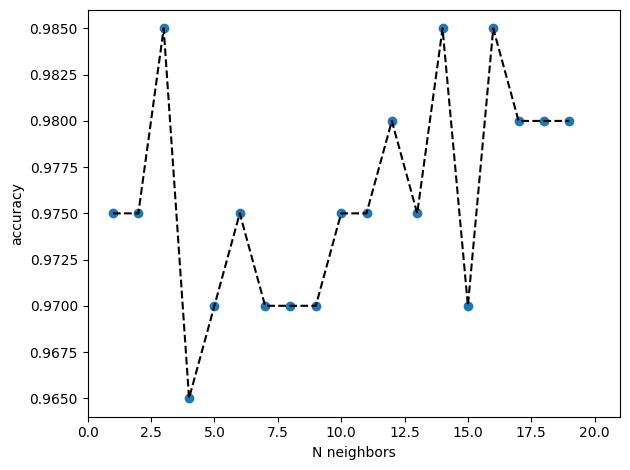

In [20]:
accuracies_knn = []
for n_neighbors in range(1, 20):
    model_knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean")
    model_knn.fit(X_train, y_train)

    accuracies_knn.append(accuracy_score(model_knn.predict(X_test), y_test))

plt.plot(range(1, 20), accuracies_knn, linestyle="--", color="black")
plt.scatter(range(1, 20), accuracies_knn)
plt.xlim((0, 21))
plt.xlabel("N neighbors")
plt.ylabel("accuracy")
plt.tight_layout()


По графику можно сказать: 3 соседа является оптимальным выбором.

**Упражнение 2**. Попробуйте найти оптимальный выбор параметра `metric` для класса `KNeighborsClassifier` в данной задаче

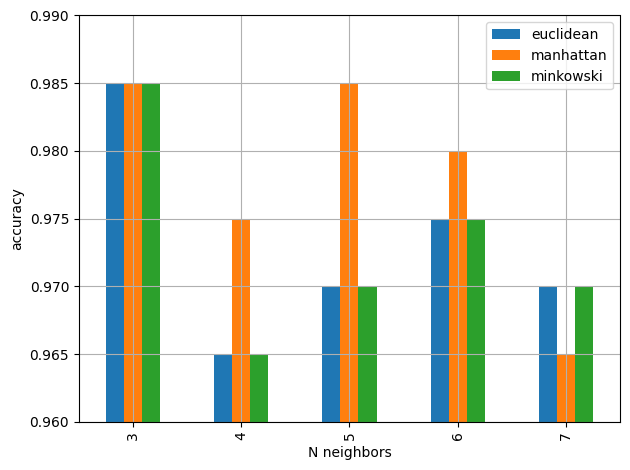

In [21]:
metrics = ["euclidean", "manhattan", "minkowski"]
accuracies_metric = []
n_neighbors = np.arange(3,8)

for metric in metrics:
    for i in n_neighbors:
        model_knn = KNeighborsClassifier(n_neighbors = i, metric = metric)
        model_knn.fit(X_train, y_train)
    
        accuracy = accuracy_score(model_knn.predict(X_test), y_test)
        accuracies_metric.append(accuracy)

index = np.arange(3,8)
data = {'euclidean': accuracies_metric[0:5],
        'manhattan': accuracies_metric[5:10],
        'minkowski': accuracies_metric[10:15]}
df1 = pd.DataFrame(data)
df1.plot(kind = 'bar')
plt.ylim(0.96, 0.99) 
plt.ylabel("accuracy")
plt.xlabel("N neighbors")
plt.xticks(ticks = np.arange(len(n_neighbors)), labels = n_neighbors)
plt.grid()
plt.tight_layout()
plt.show()


Давайте попробуем проанализировать данные с использованием только одного признака: расстояние от центра до выбранной точки

In [22]:
df["r"] = df["x0"]**2 + df["x1"]**2

X = df["r"].to_numpy().reshape((-1, 1))
y = df["target"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model_knn = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
model_knn.fit(X=X_train, y=y_train)
y_pred = model_knn.predict(X_test)

knn_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
knn_confussion_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

print(f"Accuracy of kNN: {knn_accuracy}")
print(f"Confussion matrix of kNN:\n {knn_confussion_matrix}")

Accuracy of kNN: 1.0
Confussion matrix of kNN:
 [[114   0]
 [  0  86]]


Получили идеальный классификатор. Но всегда ли он будет таким идеальным? Можем это проверить с помощью механизма кросс-валидации

In [23]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=None, shuffle=True)

X = df["r"].to_numpy().reshape((-1, 1))
y = df["target"].to_numpy()

model_cv = KNeighborsClassifier(n_neighbors=3, metric="euclidean")

cv_res = cross_validate(
    model_cv,
    X,
    y,
    scoring="accuracy",
    cv=kf,
)

print(f"Test accuracy are {cv_res['test_score']}")
print(f"Mean accuracy = {cv_res['test_score'].mean()}")

Test accuracy are [0.99  1.    1.    1.    0.995]
Mean accuracy = 0.9970000000000001


**Упражнение 3**. Проведите кросс-валидацию для модели kNN, которая обучается на паре параметров $x_0$ и $x_1$. Сравните результат с предыдущей моделью, которая обучается на одном параметре

In [ ]:
kf = KFold(n_splits=5, random_state=None, shuffle=True)

X = df[['x0', 'x1']].to_numpy()
y = df["target"].to_numpy()

model_cv = KNeighborsClassifier(n_neighbors=3, metric="euclidean")

cv_res = cross_validate(
    model_cv,
    X,
    y,
    scoring="accuracy",
    cv=kf,
)

print(f"Test accuracy are {cv_res['test_score']}")
print(f"Mean accuracy = {cv_res['test_score'].mean()}") 

Test accuracy are [0.995 0.955 0.985 0.98  0.985]
Mean accuracy = 0.9800000000000001


Если с примером про окружность все понятно, то можно приступить к набору данных с большим количеством признаков. Сгенерируем такие псевдоданные с помощью `make_classification`

In [27]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=6,
    n_classes=2,
    n_repeated=1,
    n_redundant=1,
    random_state=2,
)

df = pd.DataFrame(np.vstack((X.T, y)).T, columns=["x0", "x1", "x2", "x3", "x4", "x5", "target"])

df.head()

,x0,x1,x2,x3,x4,x5,target
0,-0.070035,1.006728,1.992567,1.545391,1.992567,0.843520,0.0
1,0.883467,0.714652,1.215424,0.795972,1.215424,-0.406246,1.0
2,0.506578,-0.445396,-0.982998,0.837789,-0.982998,0.710466,1.0
3,-1.039690,-0.646307,-1.047843,-1.045372,-1.047843,0.189569,0.0
4,-0.265684,0.814057,1.655815,1.495793,1.655815,-0.307948,0.0


Построим распределение признаков и корреляционную матрицу

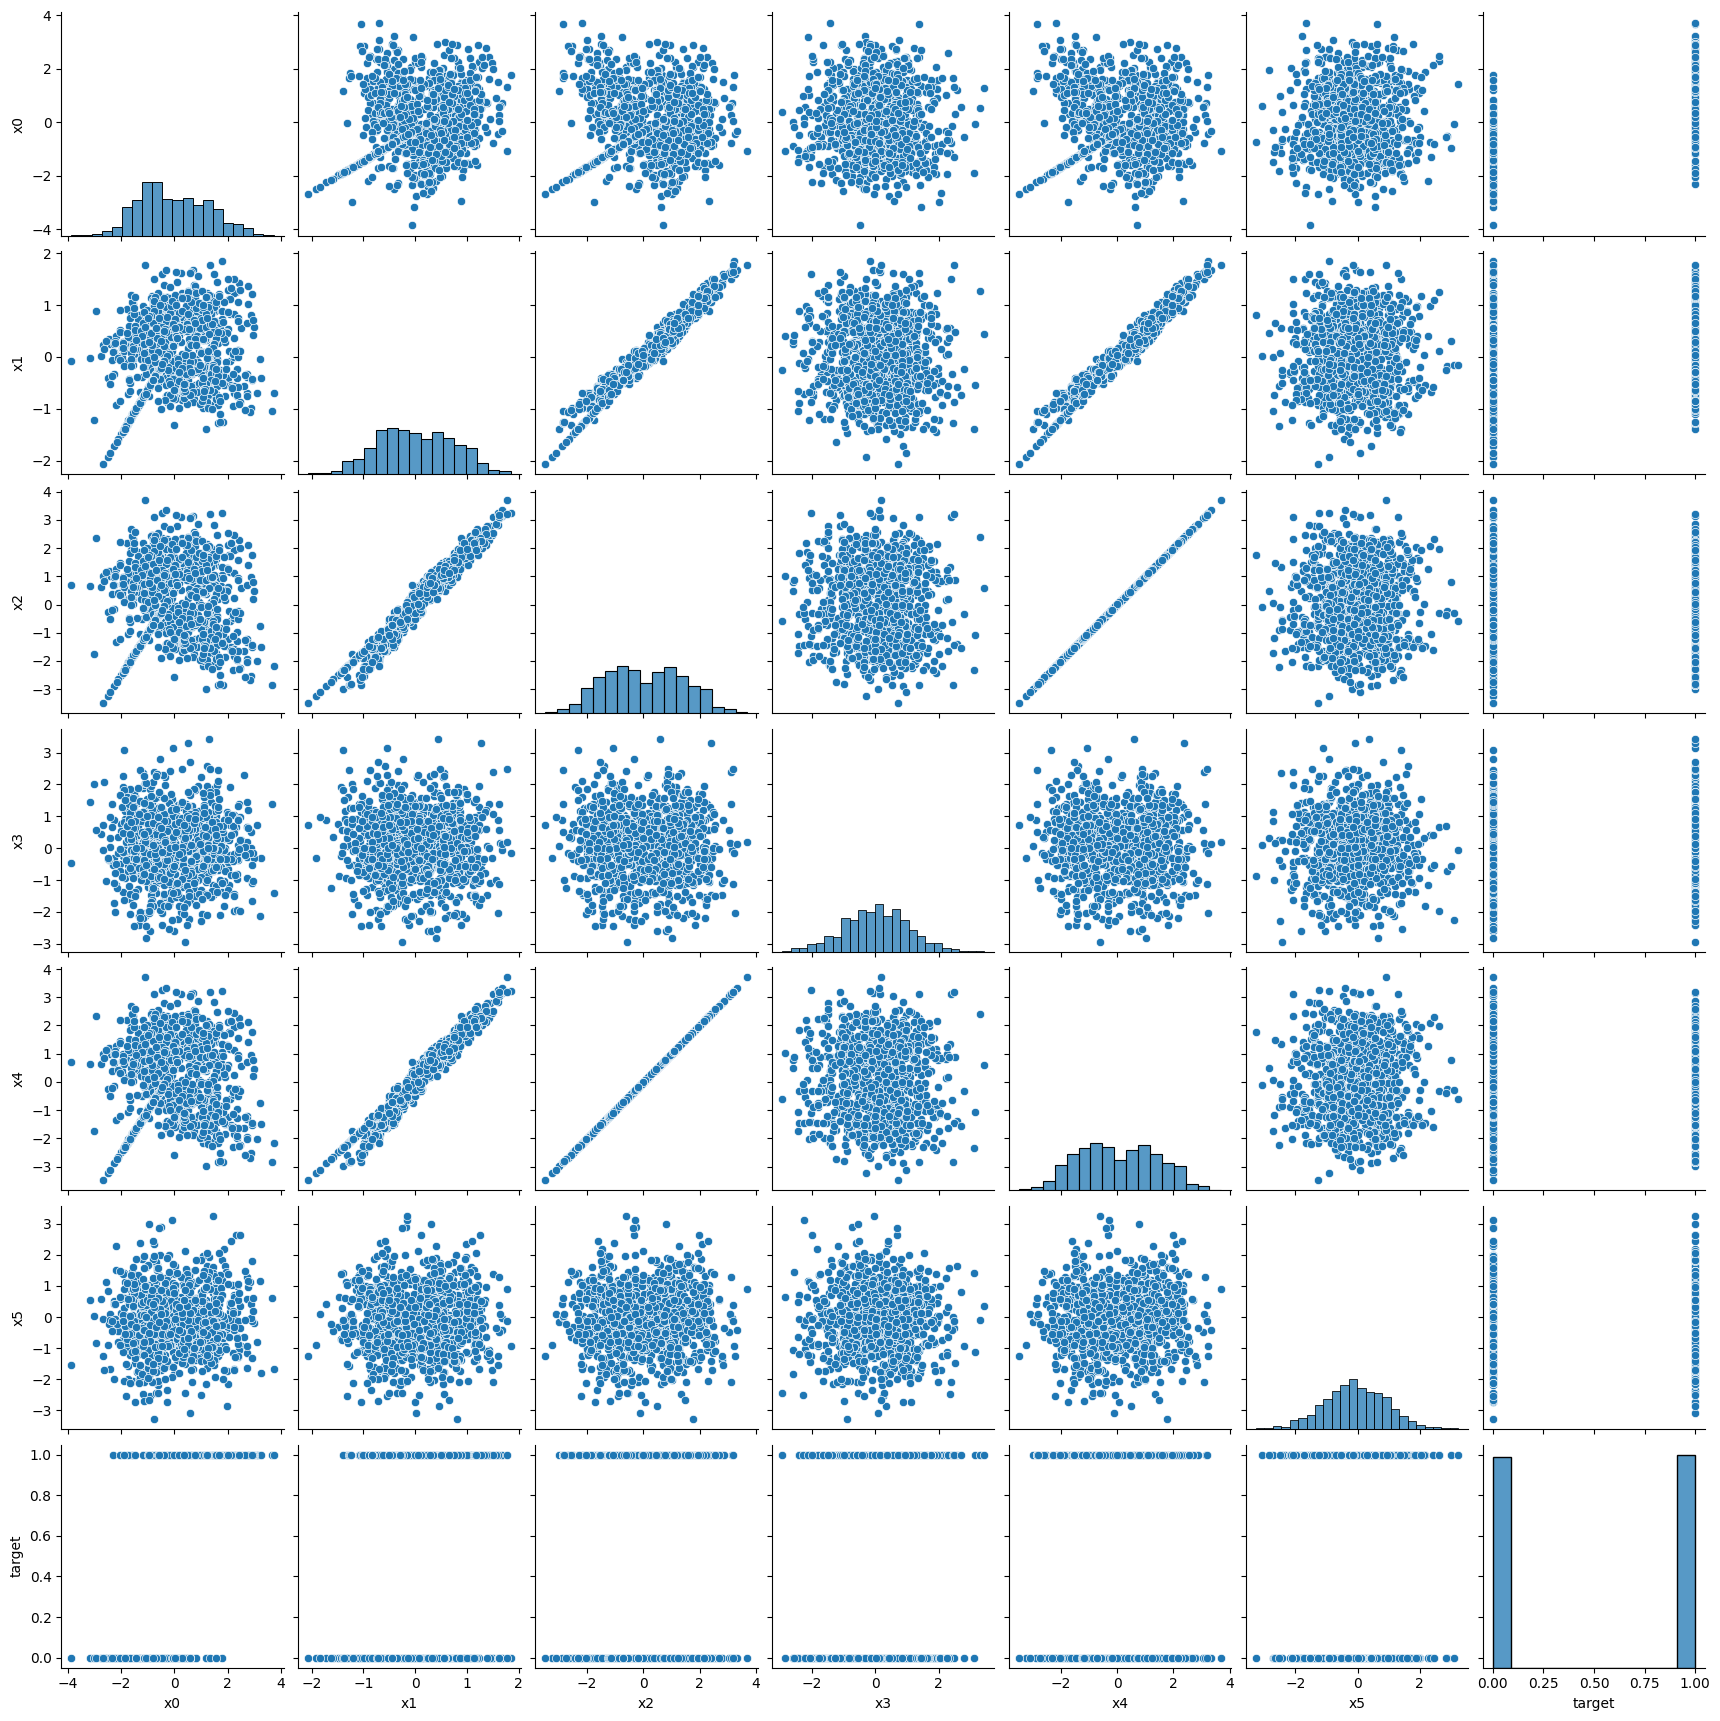

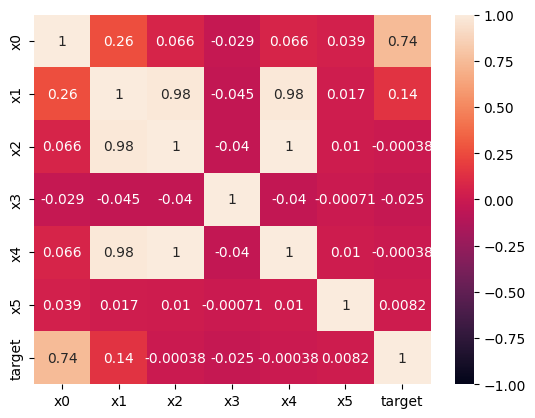

In [28]:
sns.pairplot(df)

correlation_df = df.corr()
plt.figure()
sns.heatmap(correlation_df, vmin=-1, vmax=1, annot=True);

По виду корреляционной матрицы совместным распределениям можно сказать, что часть признаков сильно корррелирует (или антикоррелирует) между собой.

Это поведение вполне очевидно, ведь для создания данных мы указали:
- `n_repeated=1` часть признаков повторяется
- `n_redundant=1` часть признаков является избыточной для описания данных

Избыточные признаки откидывают из анализа, корреляции между признаками стараются избегать. Их можно откинуть или же регуляризировать (об этом позже)

**Задание 1**. Попробуйте создать модель классификации методом kNN и обучить ее с коррелированными данными и без. Попробуйте проанализировать влияние коррелированных признаков на качество модели.

качество модели, обученной на коррелированных данных: 0.905
качество модели, обученной без коррелированных данных: 0.935


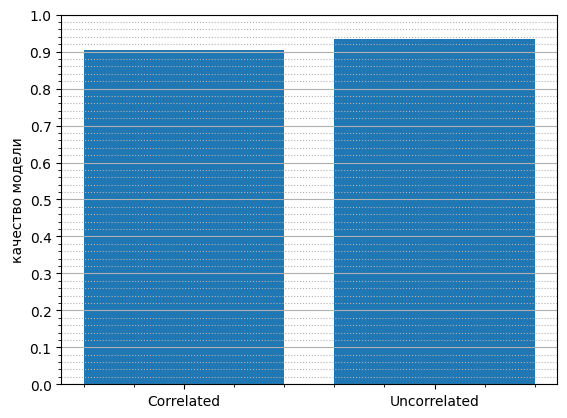

In [ ]:
def our_model_accuracy(X_train, X_test, y_train, y_test):
    model = KNeighborsClassifier(n_neighbors = 3)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

X_corr, y_corr = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
X_uncorr, y_uncorr = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)

X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(X_corr, y_corr, test_size=0.2, random_state=1)
X_train_uncorr, X_test_uncorr, y_train_uncorr, y_test_uncorr = train_test_split(X_uncorr, y_uncorr, test_size=0.2, random_state=1)

accuracy_correldata = our_model_accuracy(X_train_corr, X_test_corr, y_train_corr, y_test_corr)
print(f'качество модели, обученной на коррелированных данных: {accuracy_correldata}')
accuracy_uncorreldata = our_model_accuracy(X_train_uncorr, X_test_uncorr, y_train_uncorr, y_test_uncorr)
print(f'качество модели, обученной без коррелированных данных: {accuracy_uncorreldata}')

labels = ['Correlated', 'Uncorrelated']
accuracies = [accuracy_correldata, accuracy_uncorreldata]

plt.bar(labels, accuracies)
plt.ylabel('качество модели')
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.minorticks_on()
plt.grid(axis='y')
plt.grid(which='minor', axis='y', linestyle=':')
plt.show()


Для улучшения обучения модели иногда приходится нормализовать признаки. Под этим имеют в виду процедуру приведения признаков к нормальному распределению
- Для каждого признака вычисляется среднее и вычитается из всех признаков одновременно
- После смещения признаки масшатабируются делением на разность максимального-минимального значения

Эту процедуру уже реализует класс `Normalizer`, но частично эту процедуру можно провести с помощью `MinMaxScaler`.

**Задание 3**. Реализуйте два различных подхода к препроцессингу признаков и обучите модель kNN снова. Как это отразиться использование трансформированных признаков на качестве модели?

In [42]:
from sklearn.preprocessing import MinMaxScaler, Normalizer



Перейдем к еще одному методу решения проблемы классификации

## Дерево решений

В программировании есть понятие дерева. Это структура, которая состоит из узлов. У узла может быть родитель и наследники. Если у узла нет родителя, то этот узел является корневым. Если у узла нет наследников, то этот узел является листом.

Среди деревьев выбеляют класс бинарных деревьев. Узлы таких деревьев содержат максимум двух наследников

В каждом узле дерева можно разместить условие на какой-нибудь признак. По проверке первого условия решается куда далее "направлять" признаки. Процесс длится до момента спуска в определенный лист. И уже по листу решается принадлежность набора признаков определенному классу.

![image]( 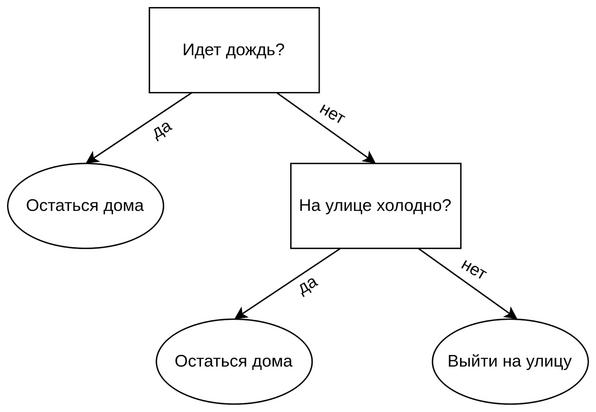)

Деревья могут использоваться и в задаче регрессии. В таком случае они подгоняют искомую зависимость кусочно-константной функцией.

![image]( 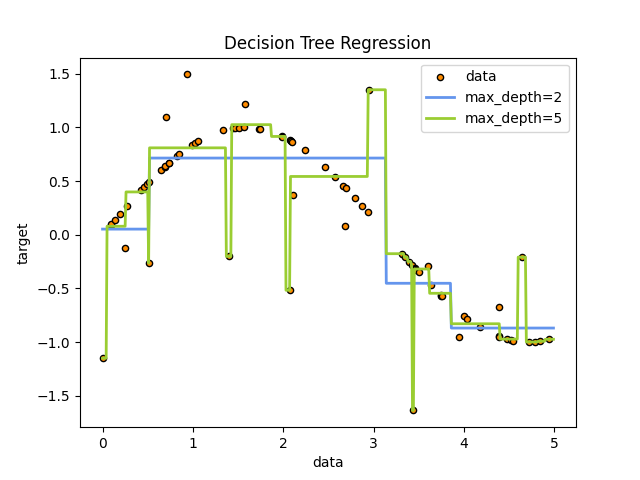)

Вся работа с деревьями содержиться в подмодуле `tree`

## Набор данных ирисы

Попробуем воспользоваться деревом решений для классификации объектов. В качестве данных возьмем `iris`:
- `sepal_length`: длина чашелистика
- `sepal_width`: ширина чашелистика
- `petal_length`: длина лепестка
- `petal_width`: ширина лепестка
- `species`: вид ириса

In [43]:
df = sns.load_dataset("iris")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Отдельно выдилим названия признаков и целевого параметра 

In [44]:
feature_names = df.columns[:-1]
target_name = df.columns[-1]

Посмотрим на совместное распределение признаков

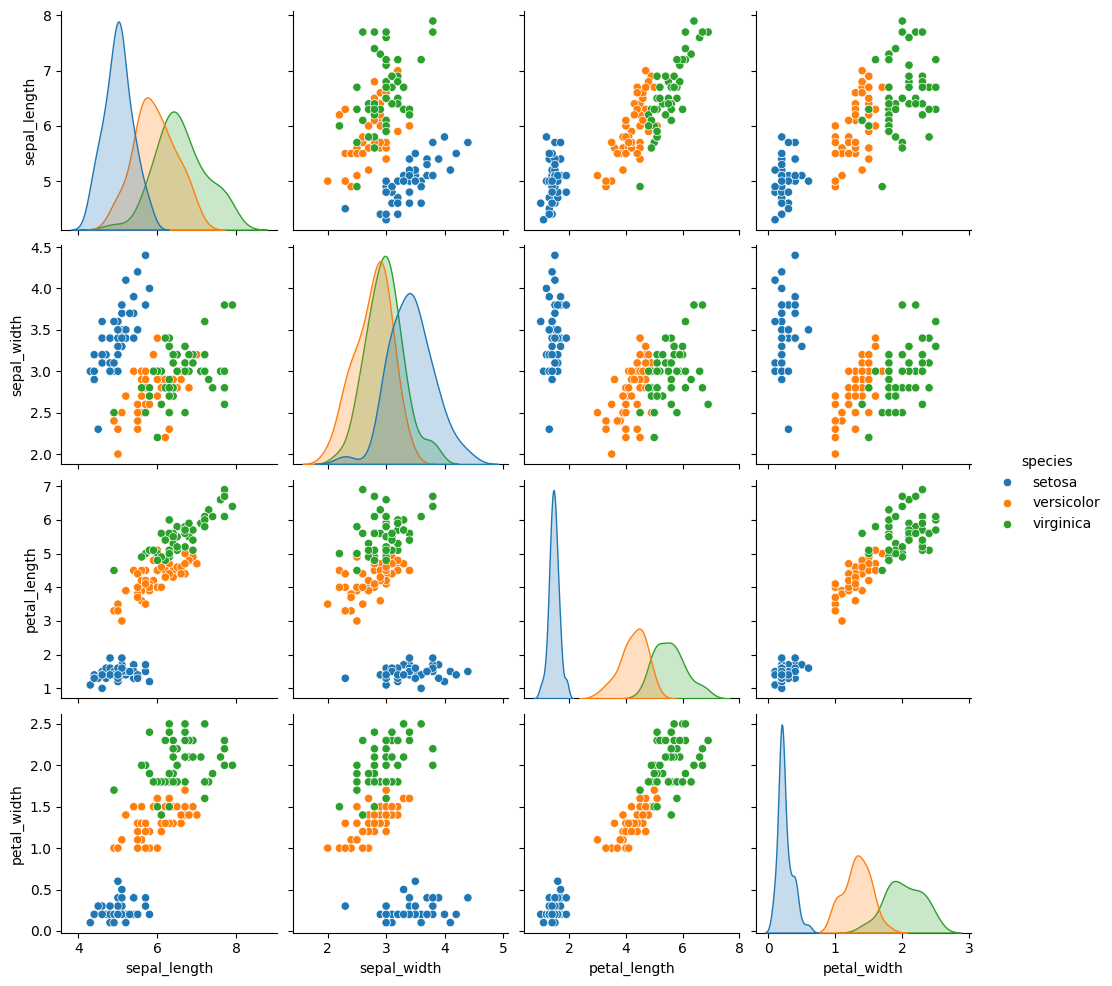

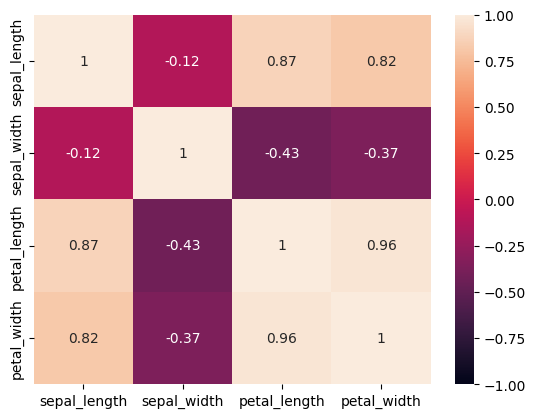

In [45]:
sns.pairplot(df, hue="species")

plt.figure()
correlation_df = df[feature_names].corr()
sns.heatmap(correlation_df, vmin=-1, vmax=1, annot=True);

Теперь мы готовы к построению модели

In [46]:
from sklearn import tree

model_tree = tree.DecisionTreeClassifier()

X = df[feature_names].to_numpy()
y = df[target_name].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

Оценим качество модели

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_true=y_test, y_pred=model_tree.predict(X_test)))

confusion_matrix(y_test, model_tree.predict(X_test))

0.9666666666666667


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Дерево решений показывает отличный результат.

## Визуализация дерева решений

Давайте посмотрим на внутренность дерева. Дерево решений можно визуализировать в текстовом формате

In [48]:
print(tree.export_text(model_tree))

|--- feature_2 <= 2.60
|   |--- class: setosa
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_1 <= 2.85
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- feature_1 >  2.85
|   |   |   |   |   |--- class: virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: virginica



Деревья решений можно визуализировать в графическом формате

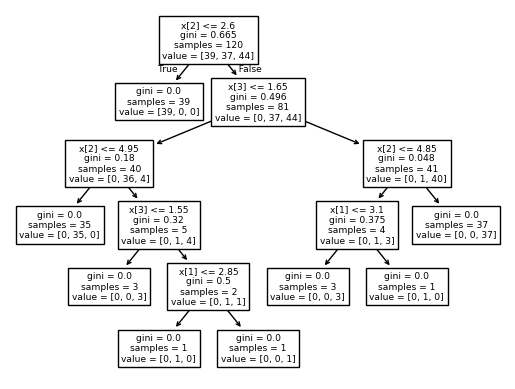

In [49]:
tree.plot_tree(model_tree);

Деревья решений легко переобучить. Например, если задать их слишком "глубокими"

In [50]:
model_tree = tree.DecisionTreeClassifier(max_features=1)
model_tree.fit(X_train, y_train)

accuracy_score(y_test, model_tree.predict(X_test)), confusion_matrix(y_test, model_tree.predict(X_test))

(0.9333333333333333,
 array([[11,  0,  0],
        [ 0, 11,  2],
        [ 0,  0,  6]]))

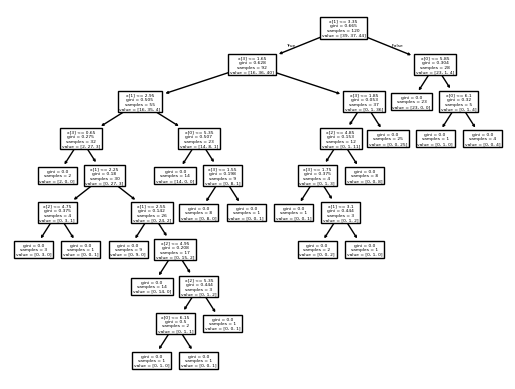

In [52]:
tree.plot_tree(model_tree);

Глубоким деревьям не доверяют. Они имеют потенциал к переобучению. Классическая глубина дерева решения составляет от 3 до 5 узлов

**Задание 2**. В качестве задачи на классификацию возьмем классический набор данных Титаника. Вам предоставляется информация о пассажирах затонувшего лайнера. Попробуйте определить влияние параметров на целевую метрику "survived".
- Определите наиболее влияющие параметры
- Воспользуйтесь алгоритмом дерева решений
- Заставьте дерево переобучиться
- Решите задачу методом kNN

In [55]:
df = sns.load_dataset("titanic")

df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [56]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [61]:
df['deck'].tail(60)


831    NaN
832    NaN
833    NaN
834    NaN
835      E
836    NaN
837    NaN
838    NaN
839      C
840    NaN
841    NaN
842    NaN
843    NaN
844    NaN
845    NaN
846    NaN
847    NaN
848    NaN
849      C
850    NaN
851    NaN
852    NaN
853      D
854    NaN
855    NaN
856    NaN
857      E
858    NaN
859    NaN
860    NaN
861    NaN
862      D
863    NaN
864    NaN
865    NaN
866    NaN
867      A
868    NaN
869    NaN
870    NaN
871      D
872      B
873    NaN
874    NaN
875    NaN
876    NaN
877    NaN
878    NaN
879      C
880    NaN
881    NaN
882    NaN
883    NaN
884    NaN
885    NaN
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [64]:
df = df.drop(columns=['alone', 'alive', 'embark_town', 'who', 'adult_male', 'class', 'alone', 'deck'], errors="ignore")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [65]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
df_encoded = df.copy()
for col in df_encoded.select_dtypes(exclude=["int", "float"]).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

scaler = StandardScaler()
df_encoded[["age", "fare"]] = scaler.fit_transform(df_encoded[["age", "fare"]])

df_encoded.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,-0.530377,1,0,-0.502445,2
1,1,1,0,0.571831,1,0,0.786845,0
2,1,3,0,-0.254825,0,0,-0.488854,2
3,1,1,0,0.365167,1,0,0.420730,2
4,0,3,1,0.365167,0,0,-0.486337,2


<Axes: >

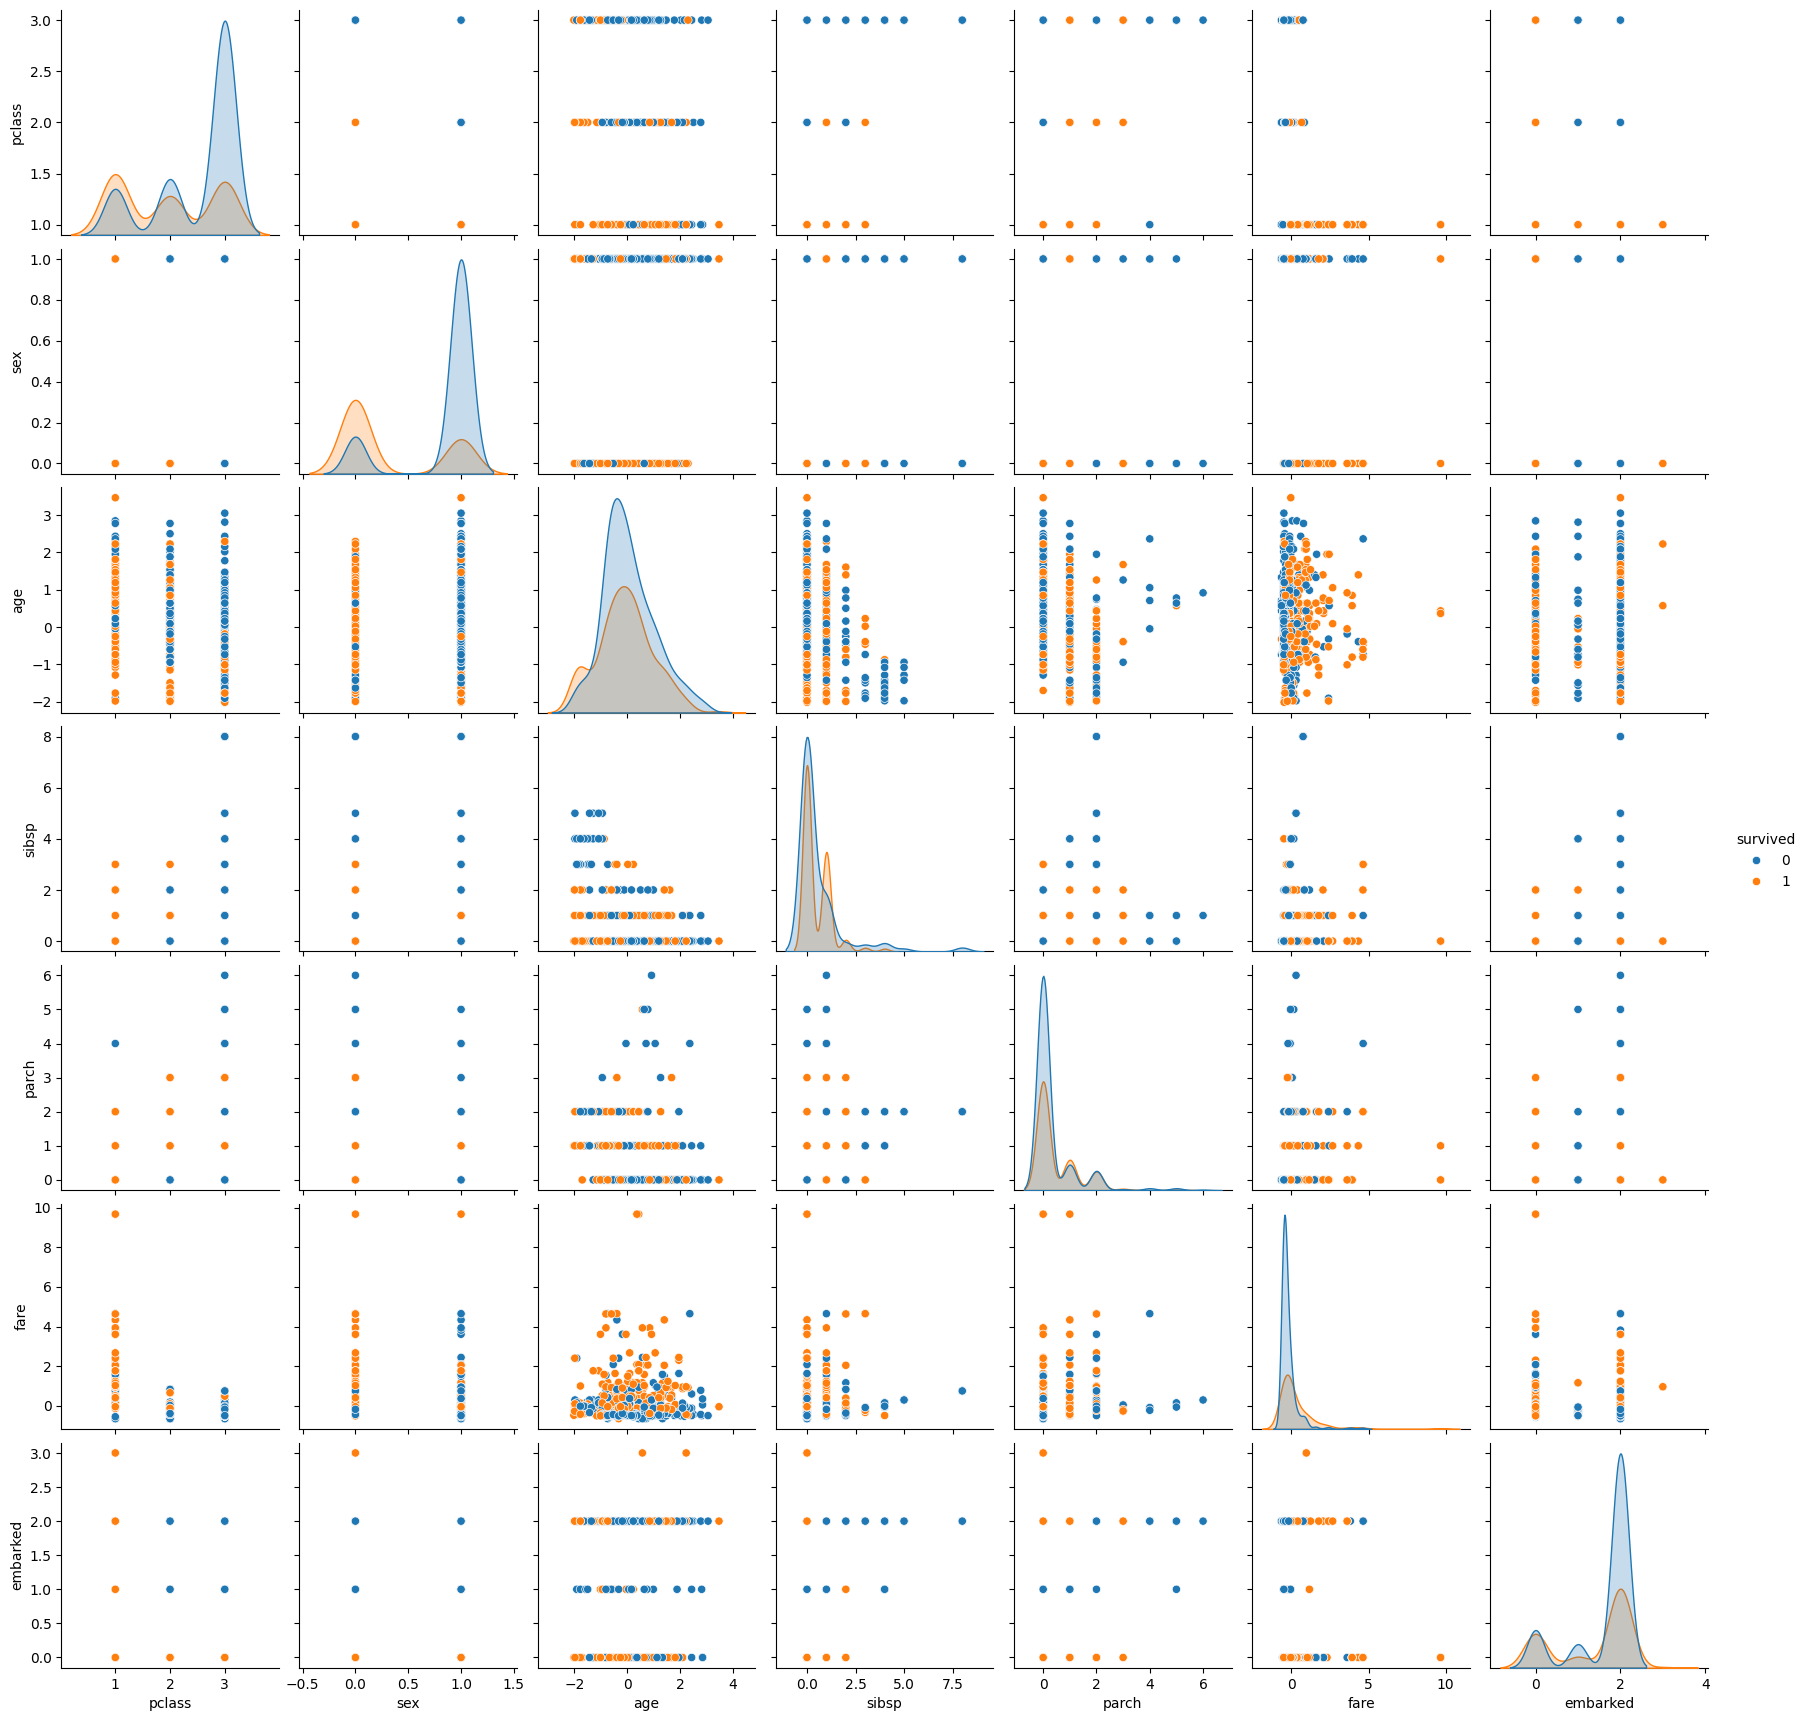

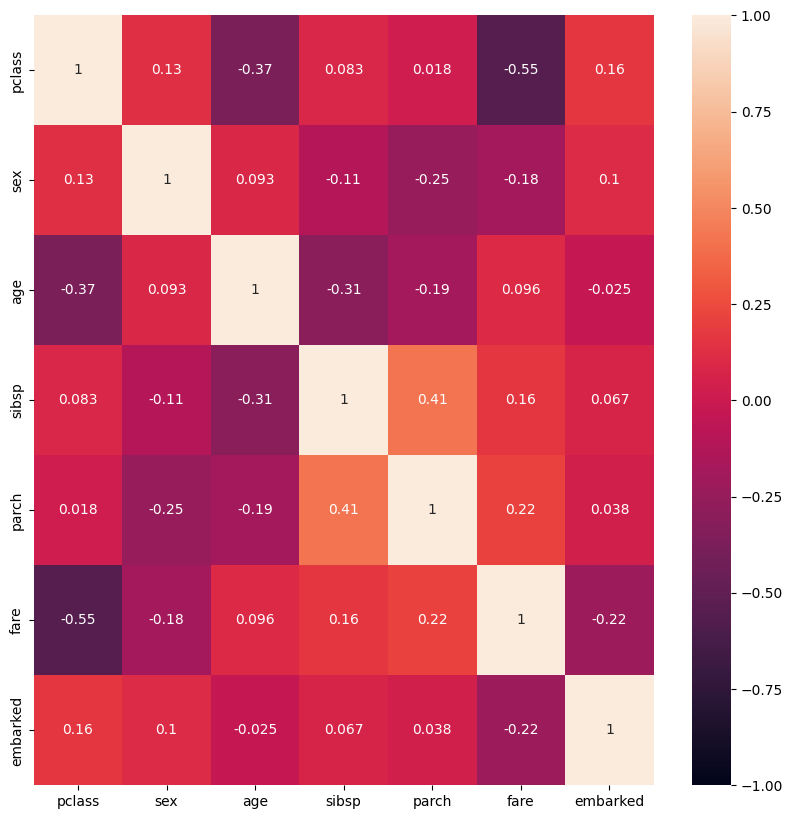

In [72]:
sns.pairplot(df_encoded, hue="survived")
plt.figure(figsize=(10, 10))
features = [i for i in df.columns if i != "survived"]
correlation_df = df_encoded[features].corr()
sns.heatmap(correlation_df, vmin=-1, vmax=1, annot=True)

In [123]:
X = df_encoded.drop(columns=["survived"], errors="ignore")  
X = X.fillna(X.mean())
y = df_encoded["survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
tree_model = tree.DecisionTreeClassifier(max_depth=5)
tree_model.fit(X_train, y_train)
print(accuracy_score(y_test, tree_model.predict(X_test)))

# переобучение модели
overfitted_tree_model = tree.DecisionTreeClassifier(max_depth=None)
overfitted_tree_model.fit(X_train, y_train)
print(f"глубина дерева: {overfitted_tree_model.get_depth()}")
print(accuracy_score(y_test, overfitted_tree_model.predict(X_test)))

0.7821229050279329
глубина дерева: 17
0.7486033519553073


In [117]:

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Оценка точности модели kNN
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(accuracy_knn)

0.7821229050279329


**Задание 3**. Проведите анализ набора данных `breast cancer`. Обучите модели kNN и дерева решений. Проанализируйте влияние признаков на качество моделей

In [ ]:
from sklearn.datasets import load_breast_cancer
from typing import TYPE_CHECKING

if TYPE_CHECKING:
    from pandas import DataFrame

dataset = load_breast_cancer(as_frame=True)
df: DataFrame = dataset.frame

print(dataset.DESCR)

df.head()

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
